In [144]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [145]:
df = pd.read_csv('adult.csv', sep=',\s')
df.head(10)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [146]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [147]:
print(df['workclass'].value_counts())
print(df['education'].value_counts())

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64


In [148]:
print(df['marital_status'].value_counts())
print(df['occupation'].value_counts())
print(df['relationship'].value_counts())

Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64
Husband           13193
Not-in-family      8304
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64


In [149]:
print(df['race'].value_counts())
print(df['sex'].value_counts())
print(df['native_country'].value_counts())
print(df['income'].value_counts())

White                 27815
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64
Male      21789
Female    10771
Name: sex, dtype: int64
United-States                 29169
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                 

In [150]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].replace('?', np.nan)

In [151]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [152]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)

In [153]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# for col in df.columns:
#     if df[col].dtype == 'object':
#         df[col] = le.fit_transform(df[col])


# df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
5,49,3,160187,6,5,3,7,1,2,0,0,0,16,22,0
6,52,5,209642,11,9,2,3,0,4,1,0,0,45,38,1
7,31,3,45781,12,14,4,9,1,4,0,14084,0,50,38,1
8,42,3,159449,9,13,2,3,0,4,1,5178,0,40,38,1
9,37,3,280464,15,10,2,3,0,2,1,0,0,80,38,1


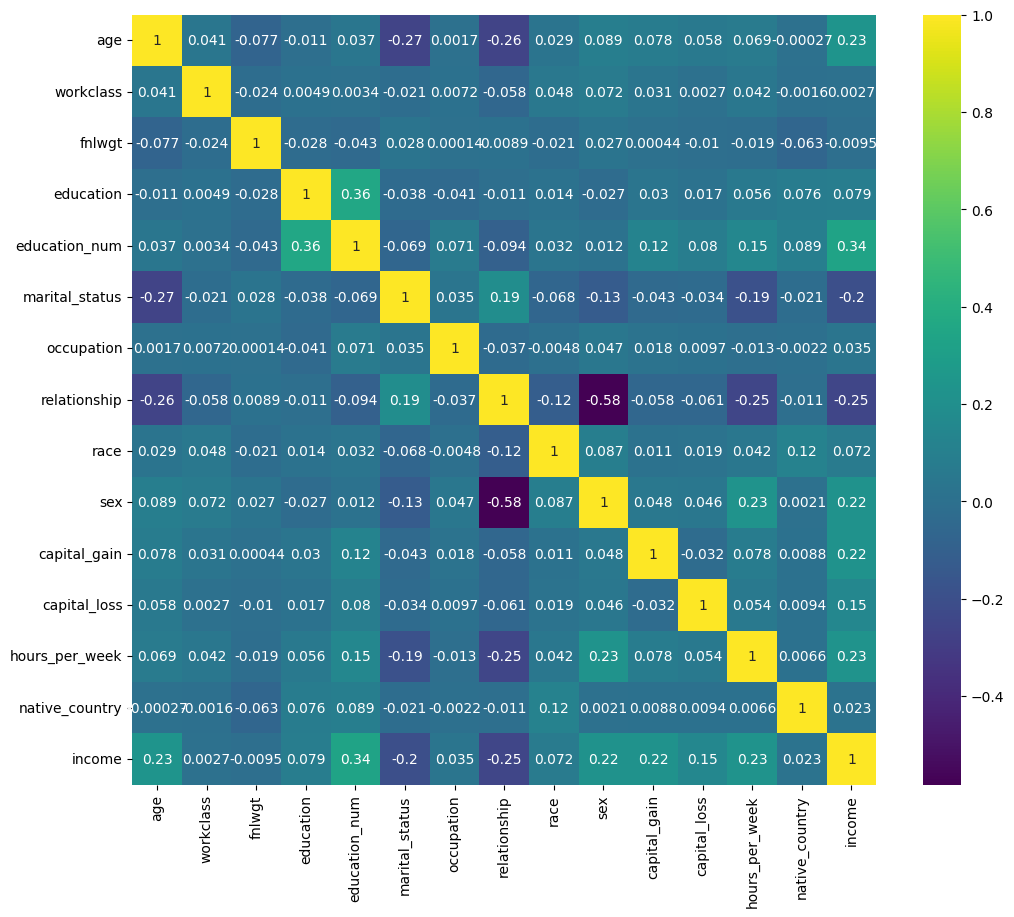

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

In [154]:
df = df.drop(['workclass', 'fnlwgt'], axis=1)

In [155]:
df.shape

(32560, 13)

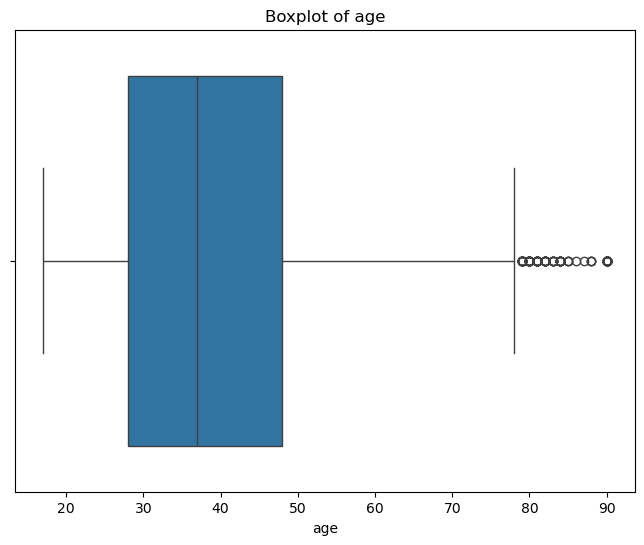

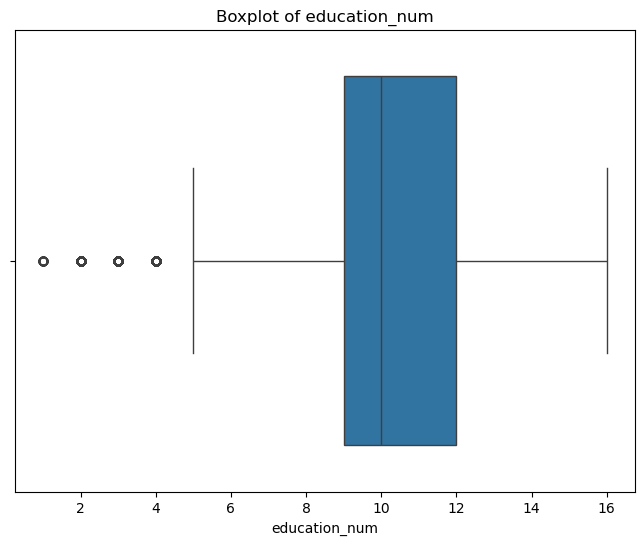

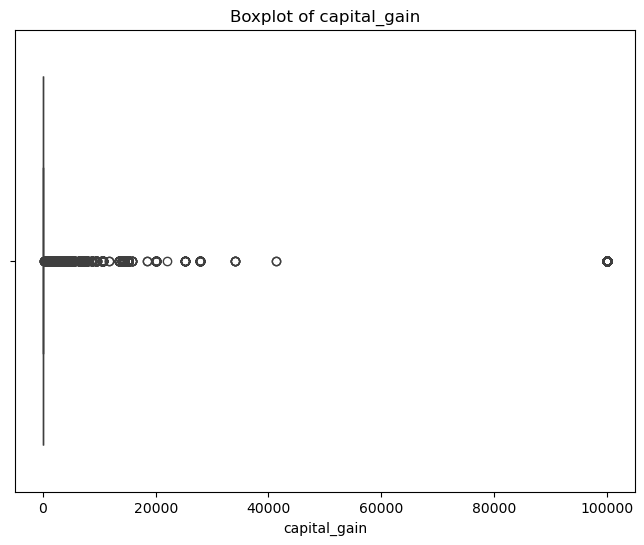

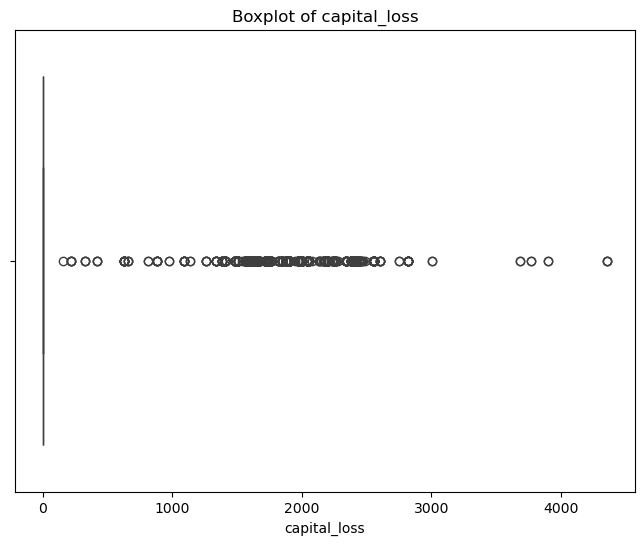

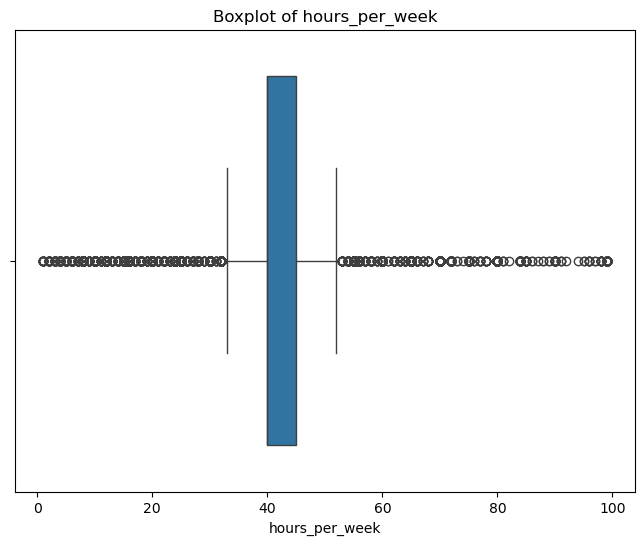

In [54]:
for column in df.columns:
  if df[column].dtype != "object":
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [156]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

for col in df.columns:
  if df[col].dtype != "object":
    df = remove_outliers_iqr(df, col)

In [157]:
df.shape

(19619, 13)

In [158]:
df['capital_loss'].value_counts()

0    19619
Name: capital_loss, dtype: int64

In [159]:
df['capital_gain'].value_counts()

0    19619
Name: capital_gain, dtype: int64

In [160]:
df.drop(['capital_loss', 'capital_gain'], axis=1, inplace=True)

In [178]:
df_majority = df[df['income'] == "<=50K"]
df_minority = df[df['income'] == ">50K"]

df_majority_downsampled = df_majority.sample(n=len(df_minority), random_state=42)


df = pd.concat([df_majority_downsampled, df_minority])


print(df['income'].value_counts())

<=50K    4138
>50K     4138
Name: income, dtype: int64


In [179]:
X = df.drop('income', axis=1)
y = df['income']

In [180]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,age,education_num,hours_per_week,education_11th,education_12th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
6401,20,10,35,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31382,51,9,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
28455,32,7,40,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11489,27,10,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10398,46,13,40,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [182]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [183]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [186]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

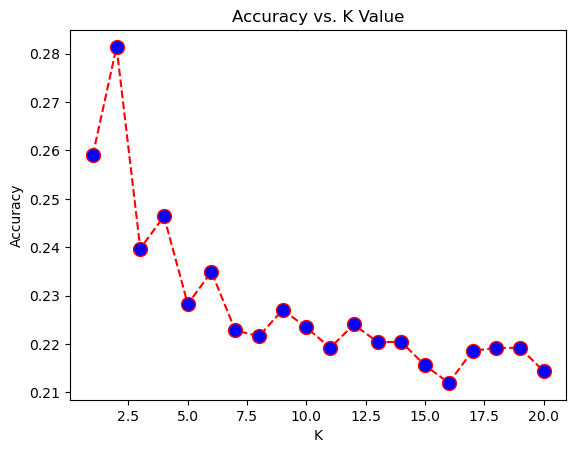

In [187]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

loss = []

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred_knn = knn.predict(x_test)
    loss.append(1-accuracy_score(y_test, y_pred_knn))

plt.plot(range(1, 21), loss, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [190]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

Accuracy: 0.7844202898550725

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.72      0.77       828
           1       0.75      0.85      0.80       828

    accuracy                           0.78      1656
   macro avg       0.79      0.78      0.78      1656
weighted avg       0.79      0.78      0.78      1656



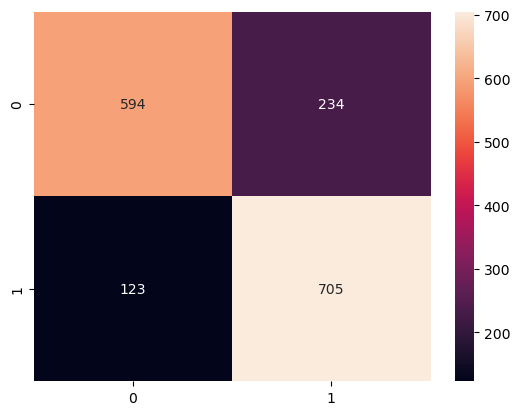

In [191]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [193]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30, 50, 100],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Accuracy on test set: {accuracy}")

Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 50}
Accuracy on test set: 0.8067632850241546


In [192]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(max_depth=None, n_estimators=1000)
rf_classifier.fit(x_train, y_train)
y_pred_rf = rf_classifier.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# cm_rf = confusion_matrix(y_test, y_pred_rf)
# sns.heatmap(cm_rf, annot=True, fmt='d')
# plt.title('Confusion Matrix - Random Forest')
# plt.show()

Accuracy: 0.7795893719806763

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       828
           1       0.78      0.78      0.78       828

    accuracy                           0.78      1656
   macro avg       0.78      0.78      0.78      1656
weighted avg       0.78      0.78      0.78      1656



In [139]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(max_depth=5)
dt_classifier.fit(x_train, y_train)

y_pred_dt = dt_classifier.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# cm_dt = confusion_matrix(y_test, y_pred_dt)
# sns.heatmap(cm_dt, annot=True, fmt='d')
# plt.title('Confusion Matrix - Decision Tree')
# plt.show()

Accuracy: 0.7209480122324159

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.69      0.80      3096
           1       0.42      0.84      0.56       828

    accuracy                           0.72      3924
   macro avg       0.68      0.77      0.68      3924
weighted avg       0.83      0.72      0.75      3924

